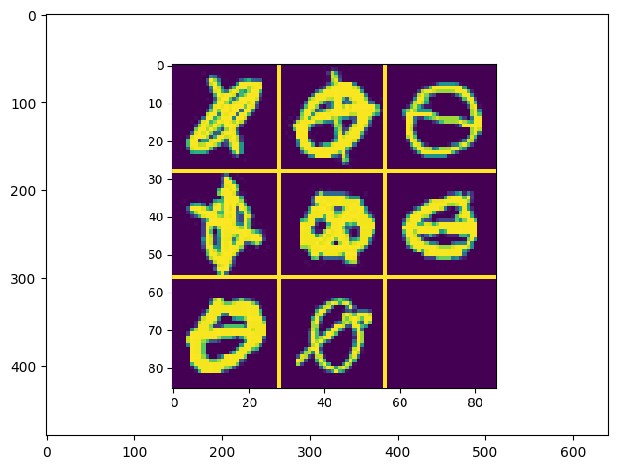

(480, 640)

In [ ]:
# Displaying one image
from skimage import io
import matplotlib.pyplot as plt
import cv2

img = io.imread('/content/drive/MyDrive/Colab Notebooks/TicTacToe Techne NNN/dataset/Test/0.png')
io.imshow(img)
plt.show()

import os
import cv2
img_array = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TicTacToe Techne NNN/dataset/Test/0.png', cv2.IMREAD_GRAYSCALE)
img_array.shape

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image, ImageOps

# Load the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/TicTacToe Techne NNN/dataset/XO_model.keras')


# Checking if the image is blank
def is_blank_image(image_array):
    # Check if all pixels are the same
    is_blank = np.all(image_array == image_array[0, 0, :])

    return is_blank


def process_tic_tac_toe(image_path):
    # Load the image
    image = Image.open(image_path).convert('RGB')
    image = ImageOps.grayscale(image)
    image = image.convert('RGB')  # the og img is not in rgb form(some alpha sth, 4 channel??), so here I converted to rgb form, then to black and white to remove the colour, and then back to rgb to get 3 channel img in order to input into vgg16 model
    # Remove white space by cropping
    bottom_left = (143, 427)
    bottom_right = (513, 427)
    top_right = (513, 58)
    top_left = (143, 58)
    image = image.crop((top_left[0], top_left[1], bottom_right[0], bottom_right[1]))

    # Get the dimensions of the image
    width, height = image.size

    # Calculate the size of each grid square
    grid_width = width // 3
    grid_height = height // 3

    # Initialize the output array
    result = [['', '', ''], ['', '', ''], ['', '', '']]

    for i in range(3):
        for j in range(3):
            # Calculate the box for each grid square
            left = j * grid_width
            upper = i * grid_height
            right = (j + 1) * grid_width
            lower = (i + 1) * grid_height

            # Crop the image to the grid square
            grid_square = image.crop((left+5, upper+5, right-5, lower-7))

            # Resize the image to (32, 32) as required by the model
            grid_square = grid_square.resize((32, 32))

            # Convert image to array and normalize it
            grid_array = img_to_array(grid_square) / 255.0
            grid_array = np.expand_dims(grid_array, axis=0)

            # Predict the class (X, O, or empty) using the model
            prediction = model.predict(grid_array)
            predicted_class = np.argmax(prediction, axis=1)[0]

            # Map the predicted class to 'X', 'O', or ''
            if is_blank_image(grid_array):
                result[i][j] = ' '
            elif predicted_class == 0:
                result[i][j] = 'X'
            elif predicted_class == 1:
                result[i][j] = 'O'
            else:
                result[i][j] = ''

    return result

# Example usage
image_path = '/content/drive/MyDrive/Colab Notebooks/TicTacToe Techne NNN/dataset/Test/10.png'
tic_tac_toe_grid = process_tic_tac_toe(image_path)
print(tic_tac_toe_grid)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[['X', 'X', 'O'], ['X', 'O', 'X'], [' ', 'X', 'X']]


1 1
2 2


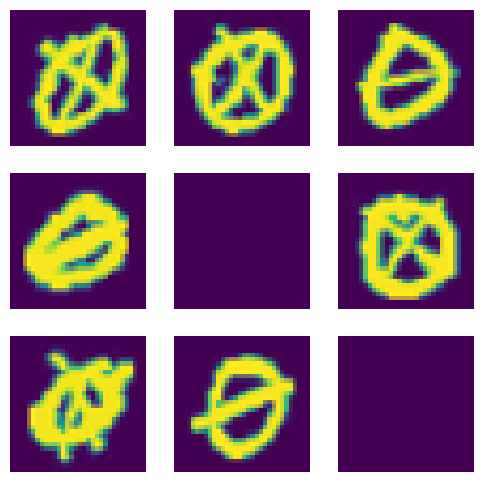

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


def is_blank_image(image_array):
    # Convert the PIL Image to a NumPy array
    image_array = np.array(image_array)
    # Check if all pixels are the same
    is_blank = np.all(image_array == image_array[0, 0, :])

    return is_blank


def show_tic_tac_toe_grids(image_path):
    # Load the image
    image = Image.open(image_path).convert('RGB')
    # Remove white space by cropping
    bottom_left = (143, 427)
    bottom_right = (513, 427)
    top_right = (513, 58)
    top_left = (143, 58)
    image = image.crop((top_left[0], top_left[1], bottom_right[0], bottom_right[1]))

    # Get the dimensions of the image
    width, height = image.size

    # Calculate the size of each grid square
    grid_width = width // 3
    grid_height = height // 3

    # Initialize a plot
    fig, axs = plt.subplots(3, 3, figsize=(6, 6))

    for i in range(3):
        for j in range(3):
            # Calculate the box for each grid square
            left = j * grid_width
            upper = i * grid_height
            right = (j + 1) * grid_width
            lower = (i + 1) * grid_height

            # Crop the image to the grid square (+-5 and 7 is to remove the yellow grid lines)
            grid_square = image.crop((left+5, upper+5, right-5, lower-7))

            # Resize the image to (32, 32)
            grid_square = grid_square.resize((32, 32))

            # Display the grid image in the corresponding subplot
            axs[i, j].imshow(grid_square)
            axs[i, j].axis('off')
            if is_blank_image(grid_square):
                print(i, j)

    # Show the plot
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/Colab Notebooks/TicTacToe Techne NNN/dataset/Test/69.png'
show_tic_tac_toe_grids(image_path)

In [ ]:
# bottom_left = (143, 427)
# bottom_right = (513, 427)
# top_right = (513, 58)
# top_left = (143, 58)

In [ ]:
# Converting to csv file (colab is crashing here for some reason; unable to generate csv file)

import os
i = 0
final_pred = []

for filename in os.listdir('/content/drive/MyDrive/Colab Notebooks/TicTacToe Techne NNN/dataset/Test'):
  current_list = []
  current_list.append(os.path.splitext(filename)[0])
  image_path = '/content/drive/MyDrive/Colab Notebooks/TicTacToe Techne NNN/dataset/Test/' + filename
  tic_tac_toe_grid = process_tic_tac_toe(image_path)
  for i in range(len(tic_tac_toe_grid)):
    for j in range(len(tic_tac_toe_grid[i])):
      current_list.append(tic_tac_toe_grid[i][j])
  current_list.append(predict_winner(tic_tac_toe_grid))
  final_pred.append(current_list)


# converting to csv
import csv
with open('final_pred.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(['ID', 'POS_1', 'POS_2', 'POS_3', 'POS_4', 'POS_5', 'POS_6', 'POS_7', 'POS_8', 'POS_9', 'Decision'])
    writer.writerows(final_pred)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/st